# Pandas and Matplotlib
## Dataset Description (Dataset Provided in the Same Folder
------
### Asume you have a file named student_data.csv with the following columns:
#### 1. Name
#### 2. Age 
#### 3. Gender (Male / Female)
#### 4. City
#### 5. Physics, Chemistry, Mathematics (marks out of 100)
#### 6. Attendance (in percentage)
#### Tasks
-------

In [14]:
!pip install pandas

In [17]:
import pandas as pd

sample_data = {
    'Name': ['Aman', 'Boman', 'Raman', 'Sneha', 'Manjisha', 'Sumiran', 'Sumit', 'Parash'],
    'Age': [20, 18, 16, 19, 17, 18, 17, 18],
    'Gender': ['Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male'],
    'City': ['Kathmandu', 'Pokhara', 'Lalitpur', 'Dharan', 'Biratnagar', 'Kathmandu', 'Pokhara', 'Lalitpur'],
    'Physics': [85, 45, 70, 60, 92, 70, 78, 30],
    'Chemistry': [79, 55, 65, 58, 89, 85, 90, 20],
    'Mathematics': [90, 35, 60, 62, 94, 70, 86, 35],
    'Attendance': [95, 80, 87, 77, 93, 60, 98, 21]
}

df = pd.DataFrame(sample_data)

df.to_csv("sample_data.csv", index=True)
df

,Name,Age,Gender,City,Physics,Chemistry,Mathematics,Attendance
0,Aman,20,Male,Kathmandu,85,79,90,95
1,Boman,18,Male,Pokhara,45,55,35,80
2,Raman,16,Male,Lalitpur,70,65,60,87
3,Sneha,19,Female,Dharan,60,58,62,77
4,Manjisha,17,Female,Biratnagar,92,89,94,93
5,Sumiran,18,Male,Kathmandu,70,85,70,60
6,Sumit,17,Male,Pokhara,78,90,86,98
7,Parash,18,Male,Lalitpur,30,20,35,21


# Task2.2. Feature Engineering
## Create a new column Average_Marks = mean of Physics, Chemistry, and Mathematics.
## Create a column Pass which should be Yes if all three subjects have marks >_40, otherwise No.

In [18]:
df = pd.DataFrame(student_data)

# 1. Calculate Average_Marks (mean of 3 subjects)
df['Average_Marks'] = df[['Physics', 'Chemistry', 'Mathematics']].mean(axis=1).round(2)

# 2. Determine Pass (Yes if all >=40, else No)
def check_pass(row):
    if row['Physics'] >= 40 and row['Chemistry'] >= 40 and row['Mathematics'] >= 40:
        return 'Yes'
    else:
        return 'No'

df['Pass'] = df.apply(check_pass, axis=1)


df


,Name,Age,Gender,City,Physics,Chemistry,Mathematics,Attendance,Average_Marks,Pass
0,Aman,20,Male,Kathmandu,85,79,90,95,84.67,Yes
1,Boman,18,Male,Pokhara,45,55,35,80,45.00,No
2,Raman,16,Male,Lalitpur,70,65,60,87,65.00,Yes
3,Sneha,19,Female,Dharan,60,58,62,77,60.00,Yes
4,Manjisha,17,Female,Biratnagar,92,89,94,93,91.67,Yes
5,Sumiran,18,Male,Kathmandu,70,85,70,60,75.00,Yes
6,Sumit,17,Male,Pokhara,78,90,86,98,84.67,Yes
7,Parash,18,Male,Lalitpur,30,20,35,21,28.33,No


# Task 2.3 Statistical Summary
## Find average marks and attendance grouped by Gender.
## Identity the top 5 students based on Average_Marks.
## Count how many students passed and failed.

In [19]:
# 1. Grouped averages by Gender
gender_stats = df.groupby('Gender')[['Average_Marks', 'Attendance']].mean().round(2)

# 2. Top 5 students by Average_Marks
top_students = df.sort_values('Average_Marks', ascending=False).head(5)[['Name', 'Average_Marks']]

# 3. Pass/Fail counts
pass_fail_count = df['Pass'].value_counts()

# Display results
print("=== Average Marks & Attendance by Gender ===")
print(gender_stats)
print("\n=== Top 5 Students ===")
print(top_students)
print("\n=== Pass/Fail Count ===")
print(pass_fail_count)

=== Average Marks & Attendance by Gender ===
        Average_Marks  Attendance
Gender                           
Female          75.84        85.0
Male            63.78        73.5

=== Top 5 Students ===
       Name  Average_Marks
4  Manjisha          91.67
0      Aman          84.67
6     Sumit          84.67
5   Sumiran          75.00
2     Raman          65.00

=== Pass/Fail Count ===
Pass
Yes    6
No     2
Name: count, dtype: int64


# Task 2.4 Data Visualization using Matplotlib
## Create a bar chart showing the numbers of students from each city.
## Plot histograms for marks in each subject.
## Plot a scatter plot of Attendance Vs Average_Marks.
## Create a pie chart showing the gender distribution.


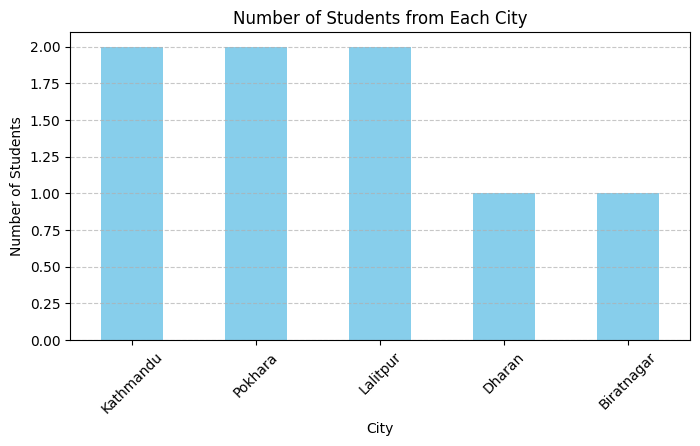

In [20]:
import matplotlib.pyplot as plt

# Count students per city
city_counts = df['City'].value_counts()

# Create bar chart
plt.figure(figsize=(8, 4))
city_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Students from Each City")
plt.xlabel("City")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

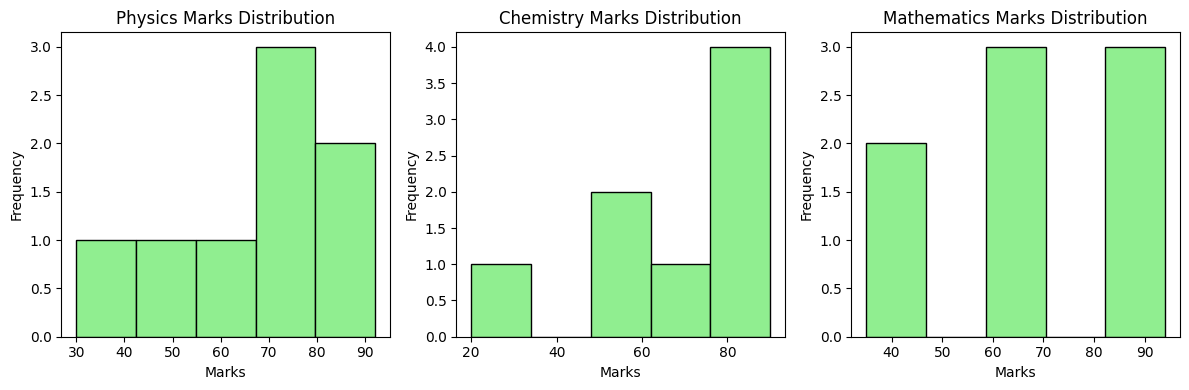

In [21]:
# Plot histograms for Physics, Chemistry, Mathematics
subjects = ['Physics', 'Chemistry', 'Mathematics']
plt.figure(figsize=(12, 4))

for i, subject in enumerate(subjects, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[subject], bins=5, color='lightgreen', edgecolor='black')
    plt.title(f"{subject} Marks Distribution")
    plt.xlabel("Marks")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

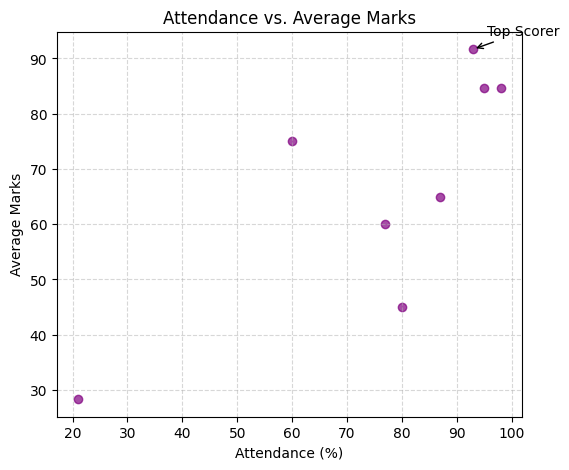

In [22]:
plt.figure(figsize=(6, 5))
plt.scatter(df['Attendance'], df['Average_Marks'], color='purple', alpha=0.7)
plt.title("Attendance vs. Average Marks")
plt.xlabel("Attendance (%)")
plt.ylabel("Average Marks")
plt.grid(linestyle='--', alpha=0.5)

# Highlight a student (e.g., highest scorer)
max_avg = df['Average_Marks'].max()
plt.annotate('Top Scorer', 
             xy=(df[df['Average_Marks'] == max_avg]['Attendance'].values[0], max_avg),
             xytext=(10, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

plt.show()

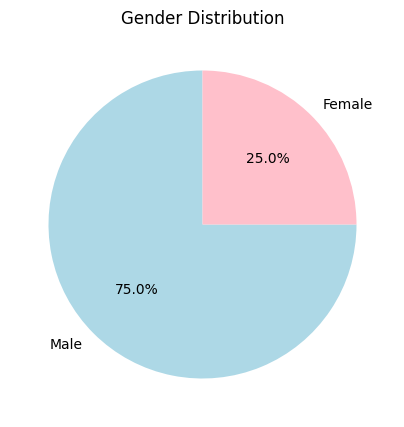

In [23]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['lightblue', 'pink'], startangle=90)
plt.title("Gender Distribution")
plt.show()

# Task 2.5 Advance Plotting 
## Create a grouped bar chart to compare the average subject-wise performance of males vs female.
## Create subplots (2*2) showing histograms of marks in Physics, Chemistry, Mathematics and Attendance.

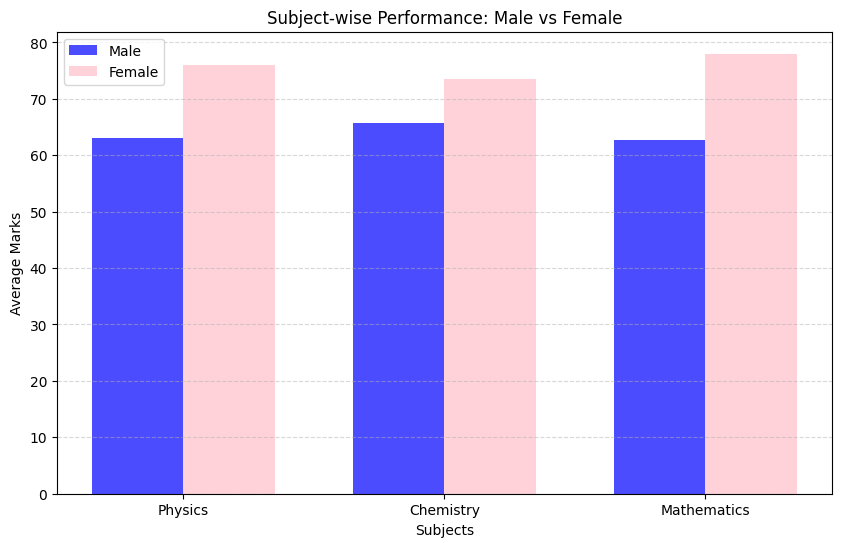

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Group data by Gender and calculate mean marks
gender_subject_avg = df.groupby('Gender')[['Physics', 'Chemistry', 'Mathematics']].mean()

# Plot settings
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(3)  # 3 subjects

# Plot bars for Male and Female
plt.bar(index, gender_subject_avg.loc['Male'], width=bar_width, label='Male', color='blue', alpha=0.7)
plt.bar(index + bar_width, gender_subject_avg.loc['Female'], width=bar_width, label='Female', color='pink', alpha=0.7)

# Customize plot
plt.xlabel('Subjects')
plt.ylabel('Average Marks')
plt.title('Subject-wise Performance: Male vs Female')
plt.xticks(index + bar_width/2, ['Physics', 'Chemistry', 'Mathematics'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

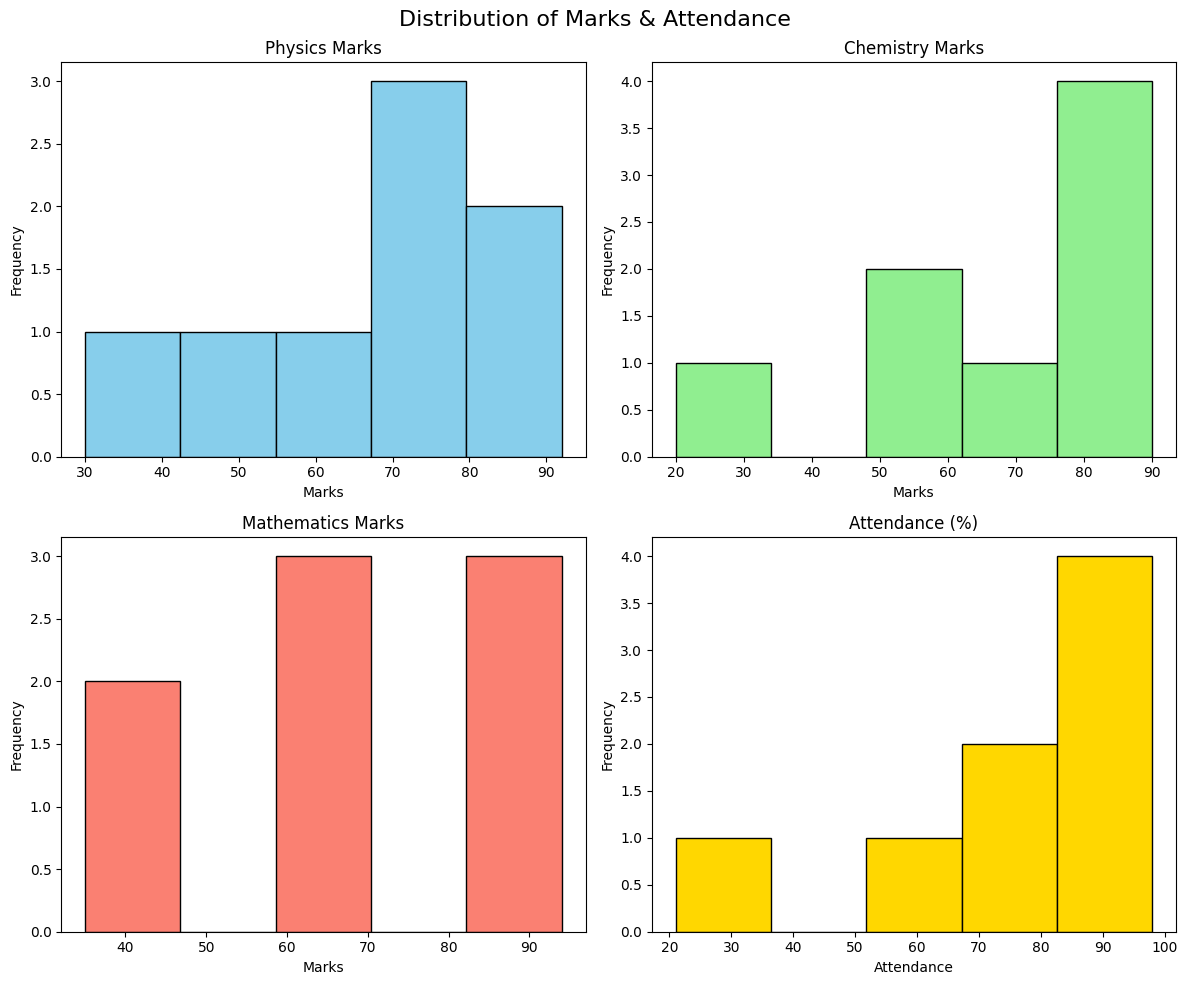

In [34]:
# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Distribution of Marks & Attendance", fontsize=16)

# Plot Physics
axes[0, 0].hist(df['Physics'], bins=5, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Physics Marks')
axes[0, 0].set_xlabel('Marks')
axes[0, 0].set_ylabel('Frequency')

# Plot Chemistry
axes[0, 1].hist(df['Chemistry'], bins=5, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Chemistry Marks')
axes[0, 1].set_xlabel('Marks')
axes[0, 1].set_ylabel('Frequency')

# Plot Mathematics
axes[1, 0].hist(df['Mathematics'], bins=5, color='salmon', edgecolor='black')
axes[1, 0].set_title('Mathematics Marks')
axes[1, 0].set_xlabel('Marks')
axes[1, 0].set_ylabel('Frequency')

# Plot Attendance
axes[1, 1].hist(df['Attendance'], bins=5, color='gold', edgecolor='black')
axes[1, 1].set_title('Attendance (%)')
axes[1, 1].set_xlabel('Attendance')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Task 2.6 Export and Report
## Save the cleaned and modified DataFrame as student_data_cleaned.csv.
## Save one of your plots as an image file named student_analysis.png.

In [24]:
# Export the cleaned DataFrame to CSV
df.to_csv("student_data_cleaned.csv", index=True)
print("DataFrame saved as 'student_data_cleaned.csv'")

DataFrame saved as 'student_data_cleaned.csv'


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# --- Recreate the grouped bar chart ---
gender_subject_avg = df.groupby('Gender')[['Physics', 'Chemistry', 'Mathematics']].mean()

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(3)

plt.bar(index, gender_subject_avg.loc['Male'], width=bar_width, label='Male', color='blue', alpha=0.7)
plt.bar(index + bar_width, gender_subject_avg.loc['Female'], width=bar_width, label='Female', color='pink', alpha=0.7)

plt.xlabel('Subjects')
plt.ylabel('Average Marks')
plt.title('Subject-wise Performance: Male vs Female')
plt.xticks(index + bar_width/2, ['Physics', 'Chemistry', 'Mathematics'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# --- Save the plot as PNG ---
plt.savefig("student_analysis.png", dpi=300, bbox_inches='tight')
plt.close()  # Close the plot to free memory
print("Plot saved as 'student_analysis.png'")

Plot saved as 'student_analysis.png'
